## Instructions


If you find yourself unsure about something; then please make an appropriate assumption and explain/document your rationale.





## Linear Regression

Please download the song_data.csv for Linear Regression and Logistic Regression assignments. 

The audio features include attributes about the music track itself, such as duration, key, year. The metadata uses more abstract features, such as danceability, energy, or song hotttnesss. 

---


Train a regression model (of your choice) to identify the energy of the song.
1.   Briefly explain why you have chosen this model.  
2.   Note down your cost. 

In [1]:
# Some libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
#Load data


# Data Pre-Processing

# Drop non-numeric datapoints

# Define your X  and y 

#Divide the data into testing dataset and training dataset

#Training

# Testing


## Logistic Regression

Using the same data as above and train the model to classify it as whether it is danceable or not.

We define a song as danceable when the dancability score of the song is $\geq0.5$ and not not dancable when the dancablility score $<0.5$. 

In [3]:

# Define your X and y 


#Divide the data into testing dataset and training dataset


#Training


# Testing


## Perceptron

Class label counts: [100 100]
x.shape: (200, 2)
y.shape: (200,)


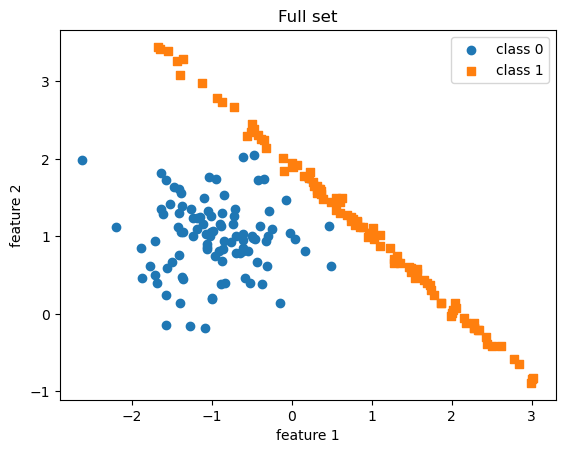

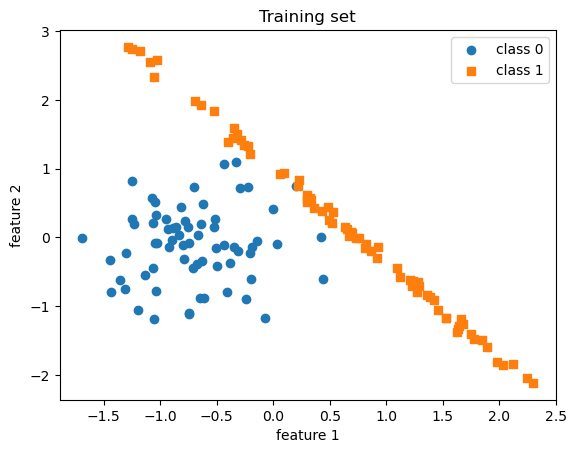

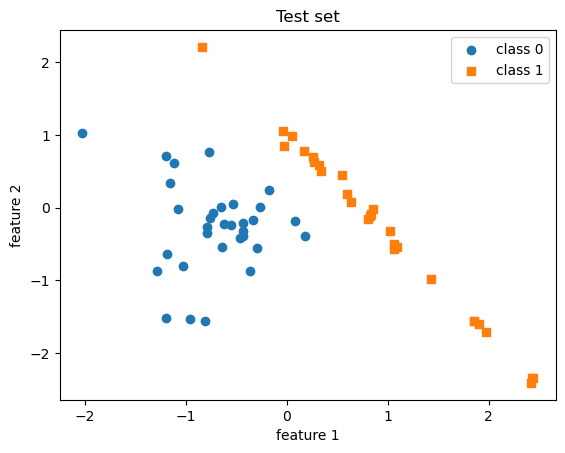

In [4]:
'''Q. Consider the following code to generate two datasets: one linear (X1, y1) and another non-linear (X2, y2). You can change parameters for your convenience.
(a) Implement the Perceptron algorithm from scratch. Verify if the algorithm takes atmost (RB)^2 iterations. R and B has usual meanings (Refer Theorem 9.1 in UML book)
    [Use (X1, y1) dataset]				[7 marks]'''

import matplotlib.pyplot as plt
import torch
%matplotlib inline
from sklearn import datasets

X1, y1 = datasets.make_classification(n_features=2, n_classes=2, n_samples=200, n_redundant=0, n_clusters_per_class=1)
print('Class label counts:', np.bincount(y1))
print('x.shape:', X1.shape)
print('y.shape:', y1.shape)

#PLOT DATA
plt.scatter(X1[y1==0, 0], X1[y1==0, 1], label='class 0', marker='o')
plt.scatter(X1[y1==1, 0], X1[y1==1, 1], label='class 1', marker='s')
plt.title('Full set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

x_train, x_test = X1[:140], X1[140:]
y_train, y_test = y1[:140], y1[140:]

# Normalize (mean zero, unit variance)
mu, sigma = x_train.mean(axis=0), x_train.std(axis=0)
x_train = (x_train - mu) / sigma
x_test = (x_test - mu) / sigma

#PLOT TRAIN DATA
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

#PLOT TEST DATA
plt.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

In [5]:
def polynom(indices_list, indices, a, b, p):
    indices = [*indices]
    if p == 0:
        indices_list.append(indices)
        return
    for i in range(a, b):
        indices.append(i)
        polynom(indices_list, indices, i, b, p-1)
        indices = indices[0:-1]

def polynomial_features(X: np.ndarray, p) -> np.ndarray:
    n, d = X.shape
    features = []
    for i in range(1, p+1):
        l = []
        polynom(l, [], 0, d, i)
        for indices in l:
            x = np.ones((n,))
            for idx in indices:
                x = x * X[:, idx]
            features.append(x)
    return np.stack(features, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


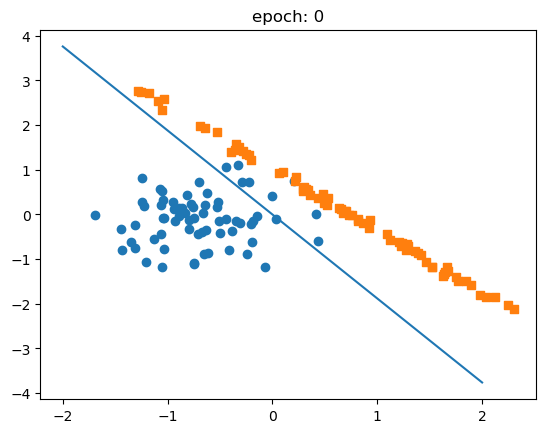

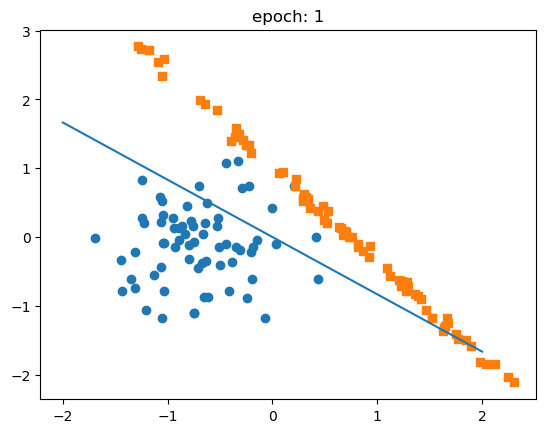

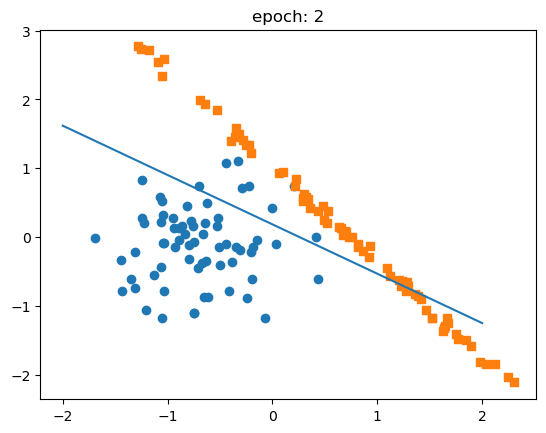

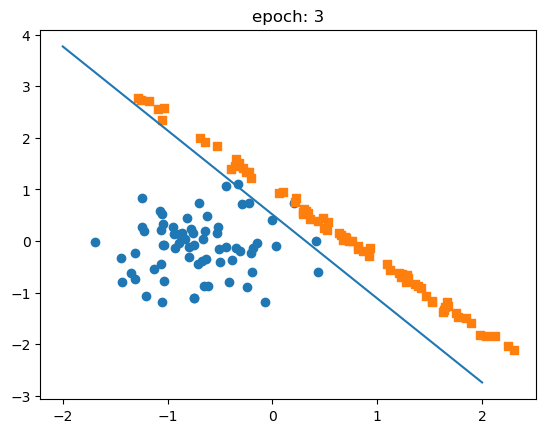

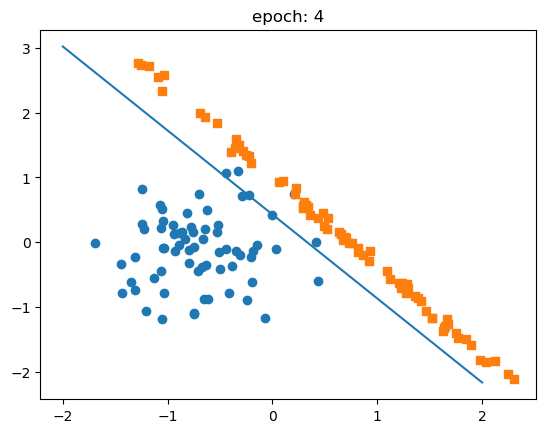

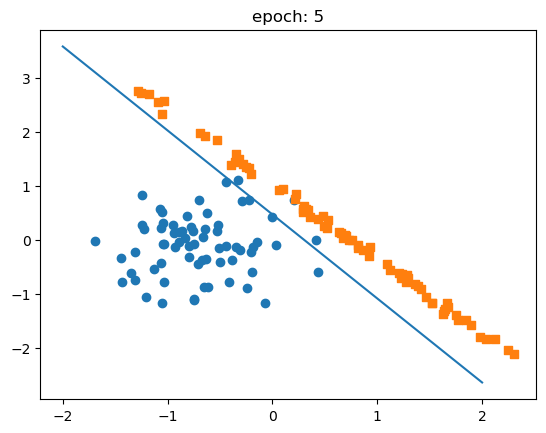

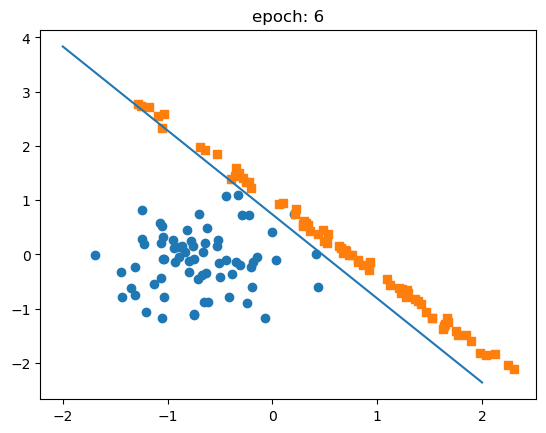

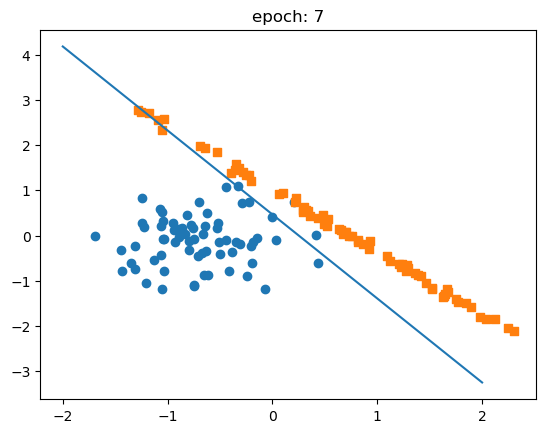

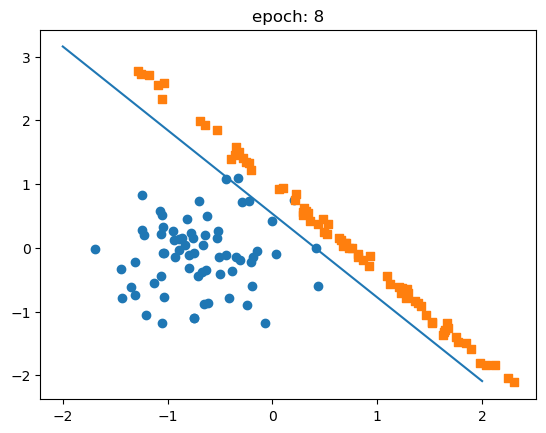

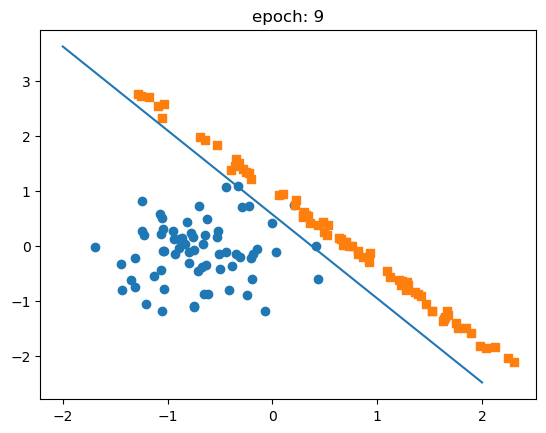

Model parameters:
  Weights: tensor([[7.9640],
        [5.2122]])
  Bias: tensor([-3.])
min||w||: tensor(4.4248)
max||xi||: tensor(16.7332)
Test set accuracy: 100.00%


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, 
                                   dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)
        
        # placeholder vectors so they don't
        # need to be recreated each time
        self.ones = torch.ones(1)
        self.zeros = torch.zeros(1)
        self.pred = torch.zeros(1, dtype=torch.float32, device=device)
        self.weight_norm_min = 100
        self.x_norm_max = 0

    def forward(self, x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.shape[0]):
                # use view because backward expects a matrix (i.e., 2D tensor)
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                self.x_norm_max = max(torch.norm(x), self.x_norm_max)
            # if feature is 2 plot line between max and min point of x[1] wrt x[0]
            if (self.num_features == 2):
                plt.scatter(x[y==0, 0], x[y==0, 1], label='class 0', marker='o')
                plt.scatter(x[y==1, 0], x[y==1, 1], label='class 1', marker='s')
                x0_min = -2
                x1_min = ( (-(self.weights[0] * x0_min) - self.bias[0]) / self.weights[1] )

                x0_max = 2
                x1_max = ( (-(self.weights[0] * x0_max) - self.bias[0])/ self.weights[1] )
     
                plt.plot([x0_min, x0_max], [x1_min, x1_max])
            elif (self.num_features == 5):
                pass
            if (self.num_features == 2):
                plt.title('epoch: '+str(e))
                plt.show()
            self.weight_norm_min = min(torch.norm(self.weights), self.weight_norm_min)
        
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy 
   
    
#TRAINING
ppn = Perceptron(num_features=2)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(x_train_tensor, y_train_tensor, epochs=10)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

print('min||w||: %s' % ppn.weight_norm_min)
print('max||xi||: %s' % ppn.x_norm_max)


#TESTING
x_test_tensor = torch.tensor(x_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = ppn.evaluate(x_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))


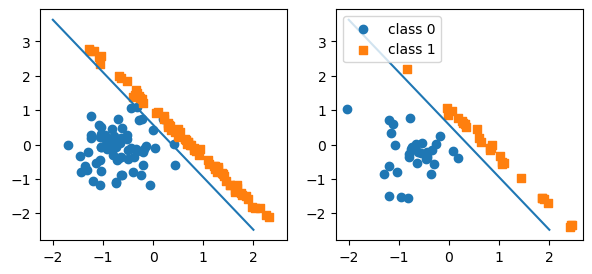

In [7]:
w, b = ppn.weights, ppn.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0]) 
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].plot([x0_min, x0_max], [x1_min, x1_max])

ax[0].scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()

Class label counts: [100 100]
x.shape: (200, 2)
y.shape: (200,)


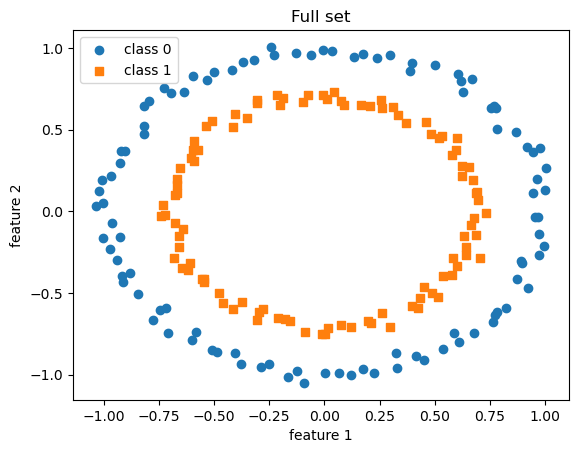

Model parameters:
  Weights: tensor([[ 0.3640],
        [ 0.1615],
        [-4.1775],
        [-0.0697],
        [-3.5590]])
  Bias: tensor([3.])
Test set accuracy: 100.00%
x0min x0max x1min x1max  -1.5378988684947887 1.465051289326674 -1.5511044751824967 1.5062370249123582
shape:  (100, 5)


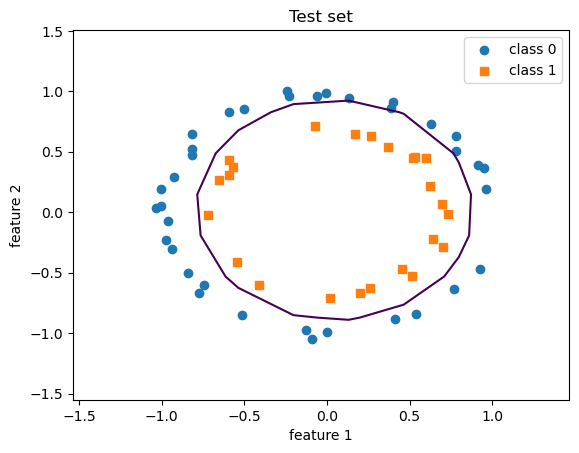

In [8]:
'''(b) Now use the (X2, y2) dataset and give an idea to solve the problem as a Binary classification problem using Perceptron.		[3 marks]
	[Web Resource: https://towardsdatascience.com/perceptron-explanation-implementation-and-a-visual-example-3c8e76b4e2d1]'''
X2, y2 = datasets.make_circles(n_samples=200, noise=0.03, factor=0.7)
print('Class label counts:', np.bincount(y2))
print('x.shape:', X2.shape)
print('y.shape:', y2.shape)

#PLOT DATA
plt.scatter(X2[y2==0, 0], X2[y2==0, 1], label='class 0', marker='o')
plt.scatter(X2[y2==1, 0], X2[y2==1, 1], label='class 1', marker='s')
plt.title('Full set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

# New feature is X2[0], X2[1], X2[0]^2, X2[0]*X2[1], X2[1]^2
X2p = polynomial_features(X2, 2)
x_train, x_test = X2p[:140], X2p[140:]
y_train, y_test = y2[:140], y2[140:]

#TRAINING
ppn = Perceptron(num_features=5)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(x_train_tensor, y_train_tensor, epochs=50)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)



#TESTING
x_test_tensor = torch.tensor(x_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = ppn.evaluate(x_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))


#PLOT TEST DATA
plt.scatter(x_test_tensor[y_test_tensor==0, 0], x_test_tensor[y_test_tensor==0, 1], label='class 0', marker='o')
plt.scatter(x_test_tensor[y_test_tensor==1, 0], x_test_tensor[y_test_tensor==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

x_test = X2[140:]

x0_min = np.min(x_test[:, 0])-0.5
x0_max = np.max(x_test[:, 0])+0.5
x1_min = np.min(x_test[:, 1])-0.5
x1_max = np.max(x_test[:, 1])+0.5
print('x0min x0max x1min x1max ', x0_min, x0_max, x1_min, x1_max)
n = 10
x = np.linspace(x0_min, x0_max, num=n)
y = np.linspace(x1_min, x1_max, num=n)
x, y = np.meshgrid(x, y)
X_cpy = np.stack([x.reshape((n*n,)), y.reshape((n*n,))], axis=1)
X_cpy =  polynomial_features(X_cpy, 2)
'''# Normalize (mean zero, unit variance)
mu, sigma = X_cpy.mean(axis=0), X_cpy.std(axis=0)
X_cpy = (X_cpy - mu) / sigma'''
print('shape: ',X_cpy.shape)
X_cpy = torch.tensor(X_cpy, dtype=torch.float32, device=device)
#plt.scatter(X_cpy[:,0], X_cpy[:,1], label='class p')

z = torch.mm(X_cpy, ppn.weights) + ppn.bias
z = z.reshape((n, n))
plt.contour(x, y, z, levels=[0])
plt.show()

In [ ]:
'''Q. Implement  3×1 MUX  for a boolean function with three variables (Use Pytorch)
                    (i) Make simple AND, OR, NOT logic gates using one layer perceptron combine them to make XOR. (XOR: F(A,B,C) = A'B + AB'+ B'C + BC').
                    (ii) Make a MLP for XOR gate of 3 variables and plot the decision boundary.
                    (iii) Comment on the complexity of both.

Useful Web Resources: https://d1b10bmlvqabco.cloudfront.net/attach/jl2b00mpen3au/jl2b0jnvzgn3hf/jn9f4p17wi31/CMSC422Perceptrons.pdf]9'''